In [1]:
%load_ext autoreload
%autoreload 2
%env PYTORCH_ENABLE_MPS_FALLBACK=1

env: PYTORCH_ENABLE_MPS_FALLBACK=1


In [12]:
from star_analysis.data.configs import SdssDatasetConfig
from star_analysis.data.datasets import Sdss

dataset = Sdss(
    config=SdssDatasetConfig(
        patch_shape=None,
        prepare=True,
        include_test_set=True,
        include_train_set=False
    )
)
len(dataset)

[INFO][2023-06-26 18:02:17,770] image_downloader.py:download_exact:62: Downloading 8162 6 0080


Found 1 data/label pairs


1

In [121]:
import torch
from star_analysis.model.neural_networks.losses.utils import compute_distance_map

x, y = dataset[0]
print("Target Map:", y.shape)
y_galaxies_cords = torch.nonzero(y[..., 0])
y_stars_cords = torch.nonzero(y[..., 1])

y_d_in = y.permute(2, 0, 1)
d = compute_distance_map(y_d_in, normed=True)
print("Distance Map:", d.shape)
d_galaxies = d[0]
d_stars = d[1]

Target Map: torch.Size([1792, 1233, 2])
Distance Map: torch.Size([2, 1792, 1233])


In [122]:
from typing import Literal
from matplotlib import pyplot as plt

def plot_distance_map(dmap, obj: Literal["Galaxies", "Stars"]):
    print(dmap.min(), dmap.max())
    im = plt.imshow(dmap.permute(1, 0), cmap='jet_r')

    if obj == "Galaxies":
        plt.scatter(y_galaxies_cords[:, 0],
                    y_galaxies_cords[:, 1], c='White', label=obj, s=2)
    elif obj == "Stars":
        plt.scatter(y_stars_cords[:, 0],
                    y_stars_cords[:, 1], c='White', label=obj, s=2)

    plt.title(f"Distance-map for {obj}")
    # plt.legend()
    plt.colorbar(im, orientation='vertical')
    plt.show()

tensor(0., dtype=torch.float16) tensor(1., dtype=torch.float16)


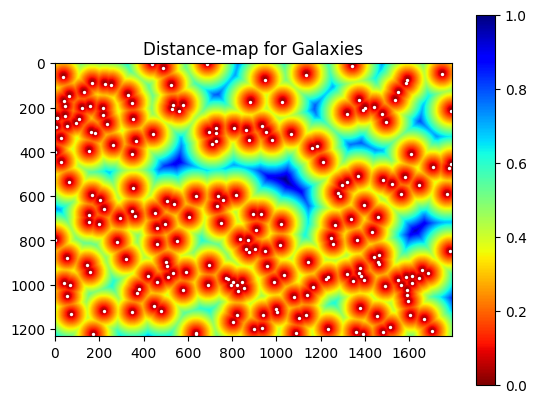

In [123]:
plot_distance_map(d_galaxies, "Galaxies")

tensor(0., dtype=torch.float16) tensor(1., dtype=torch.float16)


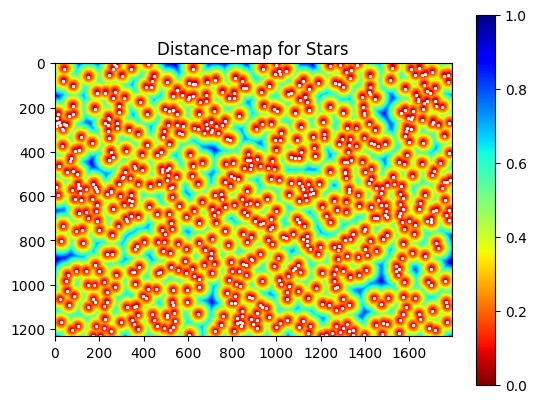

In [124]:
plot_distance_map(d_stars, "Stars")